In [1]:
import matplotlib.pyplot as plt
import matplotlib


In [26]:
import numpy as np
import matplotlib.pyplot as plt
matplotlib.rcParams['font.family'] = 's'
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['figure.dpi'] = 300

def survey(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('gist_stern')(np.linspace(0.15, 0.85, data.shape[1]))

    #fig, ax = plt.subplots(figsize=(5, 4))
    fig, ax = plt.subplots(figsize=(5, 2.5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.7,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            if c > 999:
                ax.text(x, y, str(int(c)), ha='center', va='center',
                        color=text_color)
    #ax.legend()
    
    ax.set_facecolor('aliceblue')

    return fig, ax

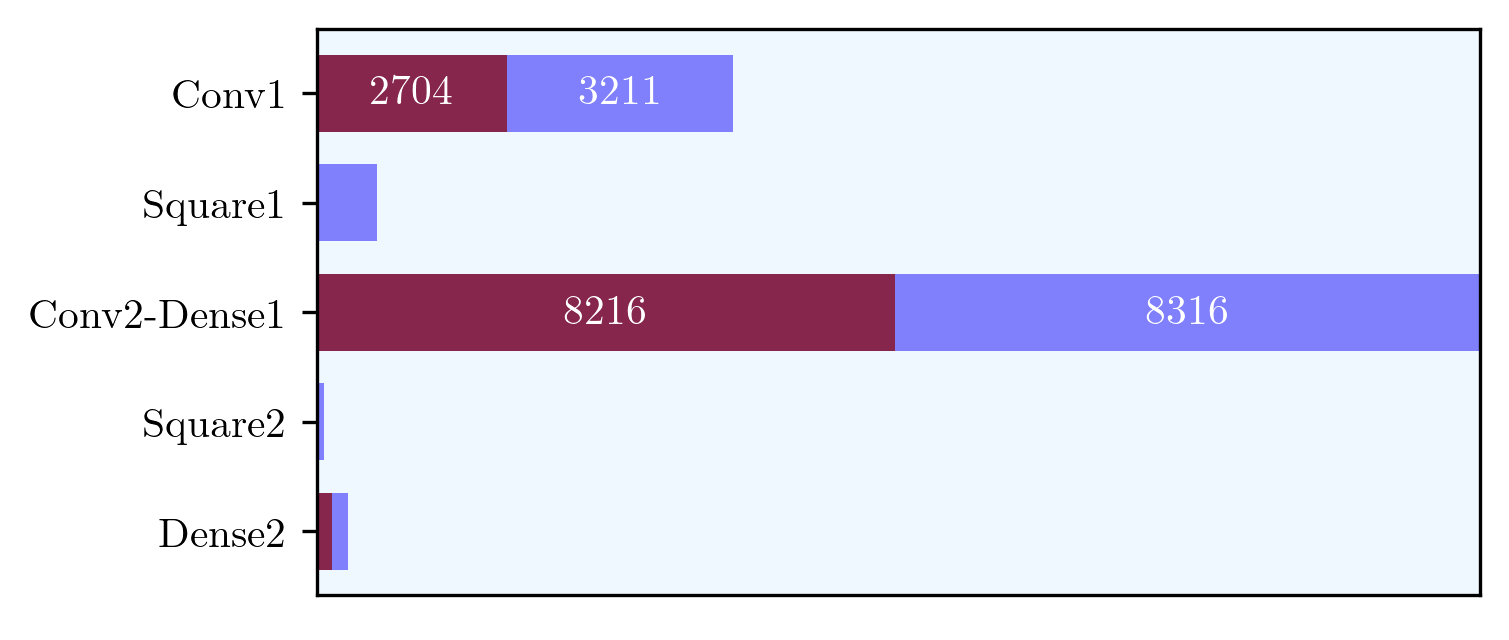

In [27]:
category_names = ['Adds', 'Multiplies',
                  'Rotations']
results = {
    'Conv1': [845+1859, 3211, 0],
    'Square1': [0, 845, 0],
    'Conv2-Dense1': [100+8116, 8316, 0],
    'Square2': [0, 100, 0],
    'Dense2': [10+208, 228, 0]
}


fig, ax = survey(results, category_names)
plt.show()

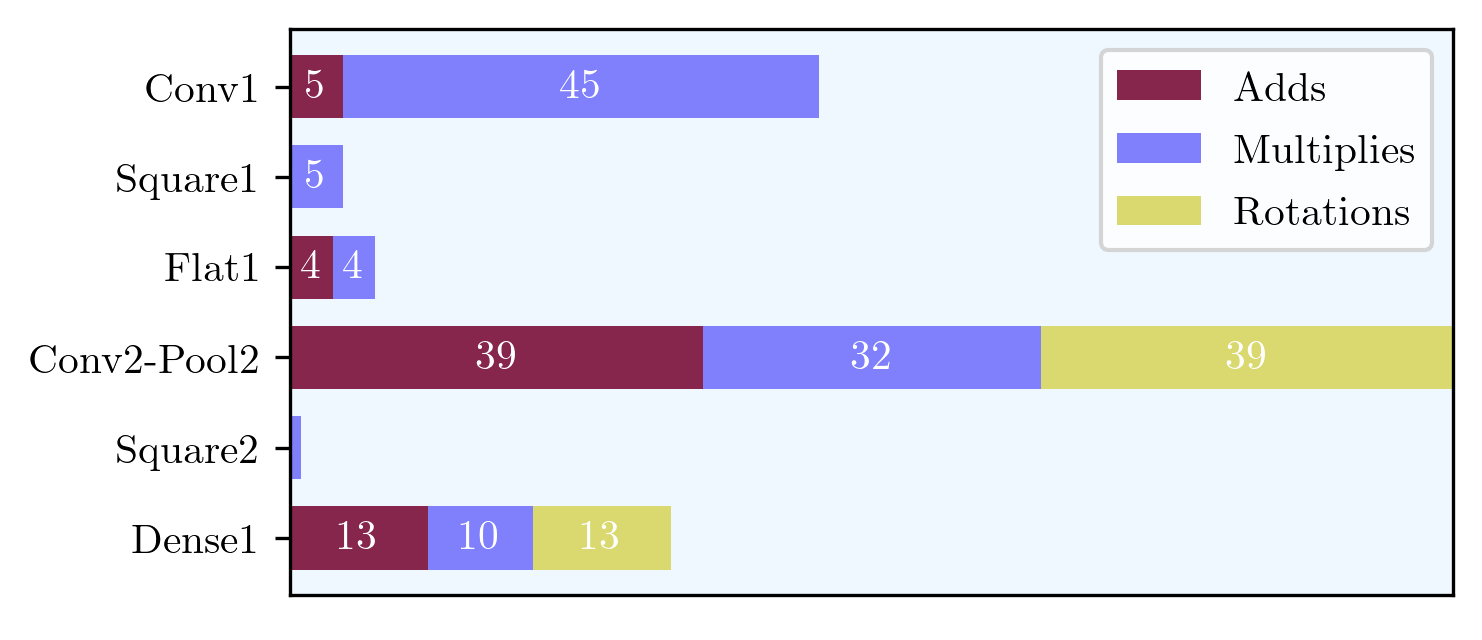

In [23]:
category_names = ['Adds', 'Multiplies',
                  'Rotations']
results = {
    'Conv1': [5, 45, 0],
    'Square1': [0, 5, 0],
    'Flat1': [4, 4, 0],
    'Conv2-Pool2': [39, 32, 39],
    'Square2': [0, 1, 0],
    'Dense1': [13, 10, 13]
}


fig, ax = survey(results, category_names)
plt.show()

In [28]:
fig.savefig('plots/mn_pruned_bars.pdf', format='pdf', bbox_inches = "tight")

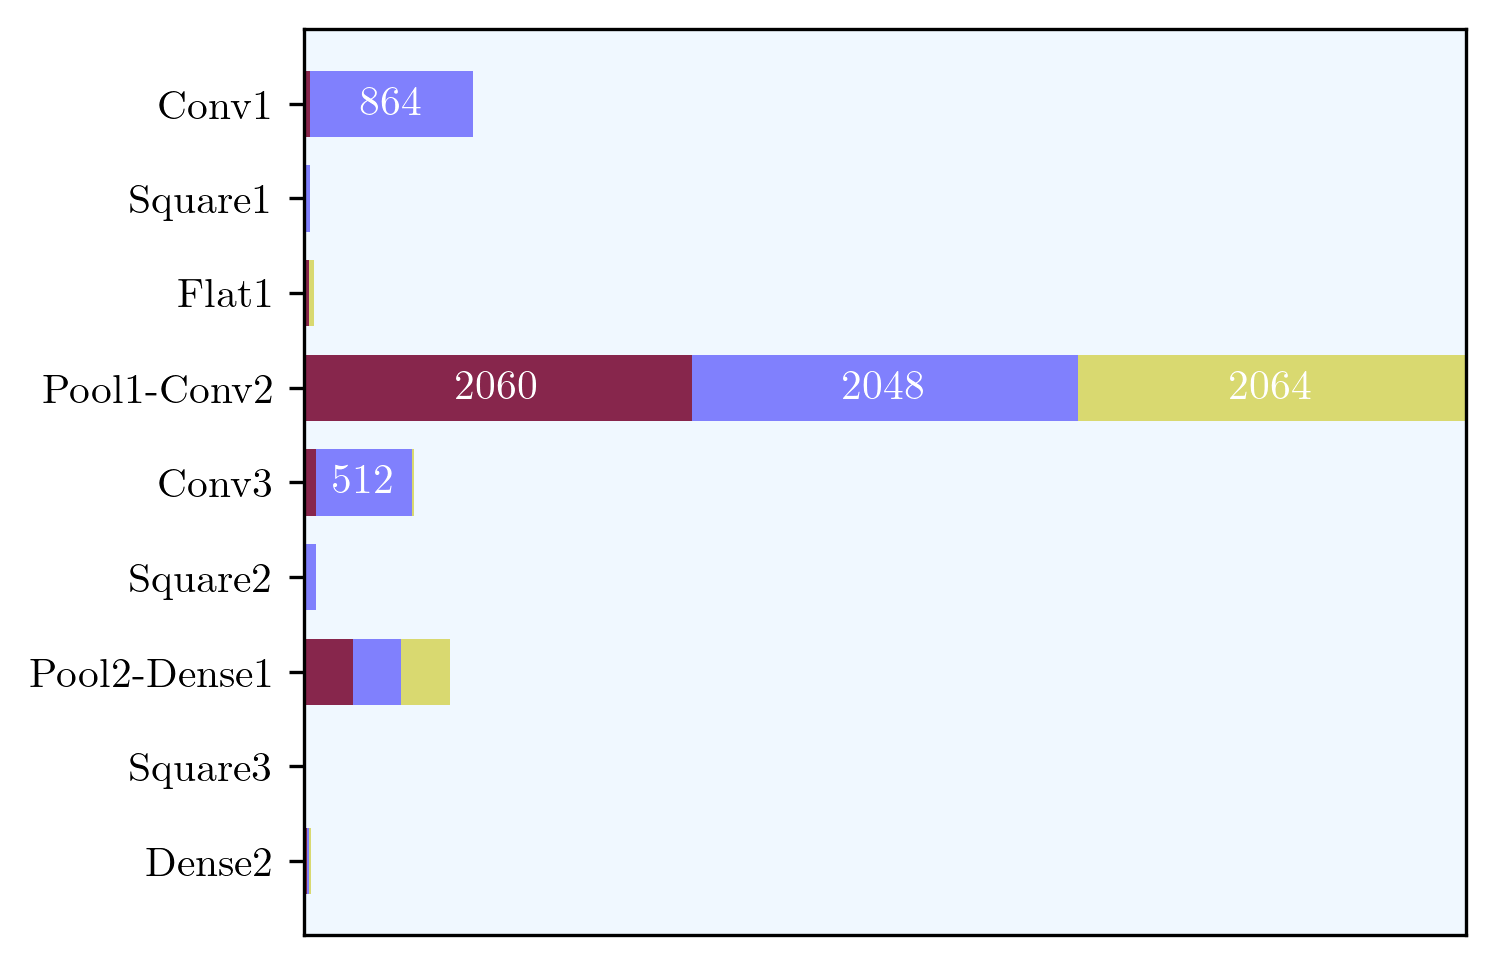

In [96]:
category_names = ['Adds', 'Multiplies',
                  'Rotations']
results = {
    'Conv1': [32, 864, 0],
    'Square1': [0, 32, 0],
    'Flat1': [28, 0, 28],
    'Pool1-Conv2': [2060, 2048, 2064],
    'Conv3': [64, 512, 8],
    'Square2': [0, 64, 0],
    'Pool2-Dense1': [261, 256, 261],
    'Square3': [0, 1, 0],
    'Dense2': [15, 10, 15],
}


fig, ax = survey(results, category_names)
plt.show()

In [97]:
fig.savefig('plots/cifar_bars.pdf', format='pdf', bbox_inches = "tight")

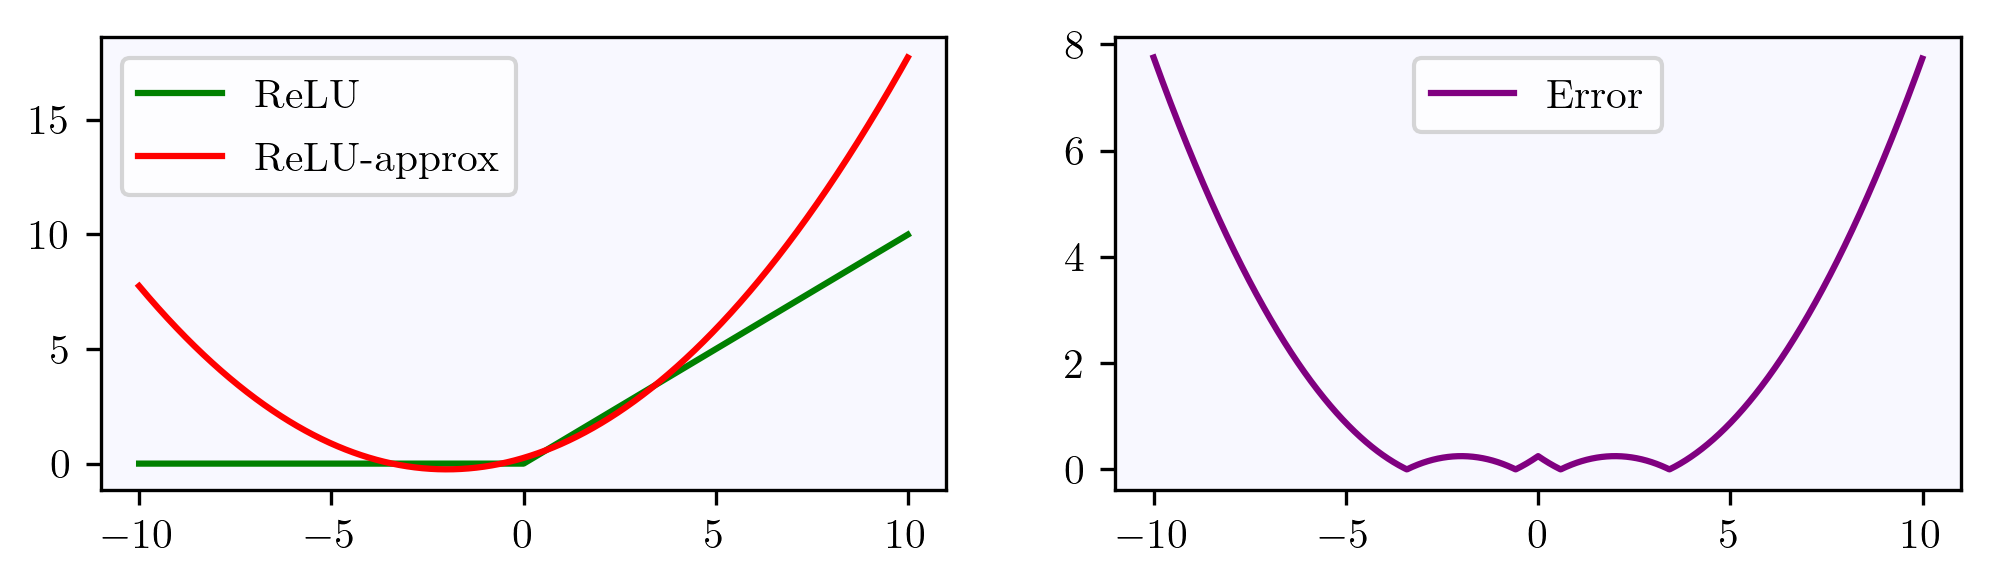

In [37]:
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(8,2), sharex=True)

def f(x):
    return max(0, x)

def g(x):
    return 0.125 * x ** 2 + 0.5 * x + 0.25

xs = [x / 100 for x in range(-1000, 1000)]
x1 = [f(x) for x in xs]
x2 = [g(x) for x in xs]
x3 = [np.abs(f(x) - g(x)) for x in xs]

axs[0].plot(xs, x1, label='ReLU', color='green')
axs[0].plot(xs, x2, label='ReLU-approx', color='red')
axs[1].plot(xs, x3, label='Error', color='purple')

ax = plt.gca()
axs[0].set_facecolor('ghostwhite')
axs[1].set_facecolor('ghostwhite')

axs[0].legend()
axs[1].legend()
plt.savefig('plots/relus.pdf', format='pdf', bbox_inches = "tight")
